# Basic Machine Learning - Main Quest 02
## 🦄 가랏, 몬스터볼! 전설의 포켓몬 찾아 삼만리

### 학습 전제
- numpy, pandas를 활용해서 표 데이터를 다뤄본 적이 있고, 이에 대한 기본적인 활용을 할 수 있습니다.
- pandas의 문법과 다양한 메서드를 활용해 본 적이 있고, 코드를 보면 어느 정도 이해할 수 있습니다.
- matplotlib을 활용해서 데이터 시각화를 해본 적이 있고, 코드를 보면 어느 정도 이해할 수 있습니다.
- 데이터셋을 train/test 데이터셋으로 나누어서 모델을 학습 및 검증해본 경험이 있습니다.

### 학습 목표
- 다양한 피처가 있는 데이터셋을 밑바닥부터 샅샅이 뜯어보고, <U>전설의 포켓몬</U>을 분류하기 위한 피처에는 무엇이 있는지 생각해 봅시다.
- 모델 학습을 시작하기 전 <U>모든 컬럼에 대해 그래프 시각화, 피벗 테이블 등을 활용하며 다양한 방법으로 충분한 EDA</U>를 진행합니다.
- 모델 학습에 넣기 위해서 전처리가 필요한 <U>모범주형/문자열 데이터에 대한 전처리를 원-핫 인코딩</U> 등으로 적절하게 진행합니다.
- <U>전체 데이터셋을 train/test 데이터셋으로 나누고</U>, 적절한 <U>분류 모델(Decision Tree)을 선택해 학습</U>시키며 베이스라인과 비교합니다.


### 1. 라이브러리 가져오기

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
# 글씨 선명하게 출력하는 설정
%config InlineBackend.figure_format = 'retina'
print('슝=3')

슝=3


In [2]:
# 포켓몬 데이터 로드
original_data = pd.read_csv("../MainQuest02/Pokemon.csv")
original_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


In [4]:
# 포켓몬 원본데이터 복사
pokemon = original_data.copy()
print(pokemon.shape)
pokemon.head()

(800, 13)


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


- 포켓몬 800명, 포켓몬 feature는 13개
- 캐글 홈페이지에서 설명하는 피처에서 'Generation', 'Legendary' 피처가 추가됨

- 타겟으로 두고 확인할 데이터: Legendary

In [7]:
# separate 'legend pokemon' and 'not legend pokemon' 
legendary = pokemon[pokemon["Legendary"] == True].reset_index(drop=True)
ordinary = pokemon[pokemon["Legendary"] == False].reset_index(drop=True)
print(legendary.shape, ordinary.shape)
display(legendary.head())
print("*"*100)
display(ordinary.head())

(65, 13) (735, 13)


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,144,Articuno,Ice,Flying,580,90,85,100,95,125,85,1,True
1,145,Zapdos,Electric,Flying,580,90,90,85,125,90,100,1,True
2,146,Moltres,Fire,Flying,580,90,100,90,125,85,90,1,True
3,150,Mewtwo,Psychic,NaN,680,106,110,90,154,90,130,1,True
4,150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True


****************************************************************************************************


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


- 800개 중 65개 데이터 : 전설의 포켓몬

### 2. 데이터 탐구
1) 결측치 확인

In [9]:
pokemon.isnull().sum()

#               0
Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

- Type 2 컬럼에만 결측치가 있음
  - 일부 포켓몬은 두번째 속성을 가지고 있다고 설명(캐글홈페이지) 

In [10]:
# 전체 컬럼 이해하기
print(len(pokemon.columns))
pokemon.columns

13


Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

- feature 정리   
    - \# : 포켓몬 Id number. 성별이 다르지만 같은 포켓몬인 경우 등은 같은 #값을 가진다. int   
    - Name : 포켓몬 이름. 포켓몬 각각의 이름으로 저장되고, 800개의 포켓몬의 이름 데이터는 모두 다르다. (unique) str   
    - Type 1 : 첫 번째 속성. 속성을 하나만 가지는 경우 Type 1에 입력된다. str   
    - Type 2 : 두 번째 속성. 속성을 하나만 가지는 포켓몬의 경우 Type 2는 NaN(결측값)을 가진다. str   
    - Total : 전체 6가지 스탯의 총합. int   
    - HP : 포켓몬의 체력. int   
    - Attack : 물리 공격력. (scratch, punch 등) int   
    - Defense : 물리 공격에 대한 방어력. int   
    - Sp. Atk : 특수 공격력. (fire blast, bubble beam 등) int   
    - Sp. Def : 특수 공격에 대한 방어력. int   
    - Speed : 포켓몬 매치에 대해 어떤 포켓몬이 먼저 공격할지를 결정. (더 높은 포켓몬이 먼저 공격한다) int   
    - Generation : 포켓몬의 세대. 현재 데이터에는 6세대까지 있다. int   
    - Legendary : 전설의 포켓몬 여부. !! Target feature !! bool   

---
[\# : ID number] 

In [17]:
# # ID number 중복 데이터 있는지 확인
len(set(pokemon["#"]))

721

- 전체 데이터 : 800, \# set 자료형 : 721
  - set 은 중복데이터를 가지지않음
  - 79개 데이터는 중복됨(unique하지 않음) => 인덱스로 사용할수 없음

In [18]:
# 같은 # 값 가지는 포켓몬 확인
pokemon[pokemon["#"] == 6]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False


-  Charizard(리자몽)로부터 시작해서 진화한 Mega Charizard가 있고, X, Y는 버전
  

---
[Name : 이름]

In [19]:
# name 중복 데이터 있는지 확인
len(set(pokemon["Name"]))


800

- 이름은 모두 unique

---
[Type 1 & Type 2 : 포켓몬 속성] 

In [21]:
# 무작위로 포켓몬 2명 확인
pokemon.loc[[6,10]]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
10,8,Wartortle,Water,NaN,405,59,63,80,65,80,58,1,False


In [22]:
# 각 속성의 종류 확인
len(list(set(pokemon["Type 1"]))), len(list(set(pokemon["Type 2"])))

(18, 19)

- Type 2에 종류가 하나 더 있는데 -> 아마도 NaN 결측값?
- [파이썬 차집합 함수 set difference](https://www.w3schools.com/python/ref_set_difference.asp) 로 확인

In [23]:
# 차집합으로 타입2에만 있는 값 확인
set(pokemon["Type 2"]) - set(pokemon["Type 1"])

{nan}

In [24]:
# 포켓몬 타입 데이터 변수로 저장
types = list(set(pokemon["Type 1"]))
print(len(types))
print(types)

18
['Fairy', 'Electric', 'Grass', 'Fire', 'Psychic', 'Ice', 'Dragon', 'Steel', 'Water', 'Poison', 'Fighting', 'Dark', 'Flying', 'Bug', 'Ghost', 'Rock', 'Normal', 'Ground']


In [25]:
# 타입 1개만 갖고 있는 포켓몬 == Type 2가 NaN인 포켓몬 확인
pokemon["Type 2"].isna().sum()

386

- 속성 1개 포켓몬 : 386
- 속성 2개 포켓몬 : 414


[Type 1 데이터 분포 plot]
- 일반 포켓몬 - 전설의 포켓몬 속성 분포 확인

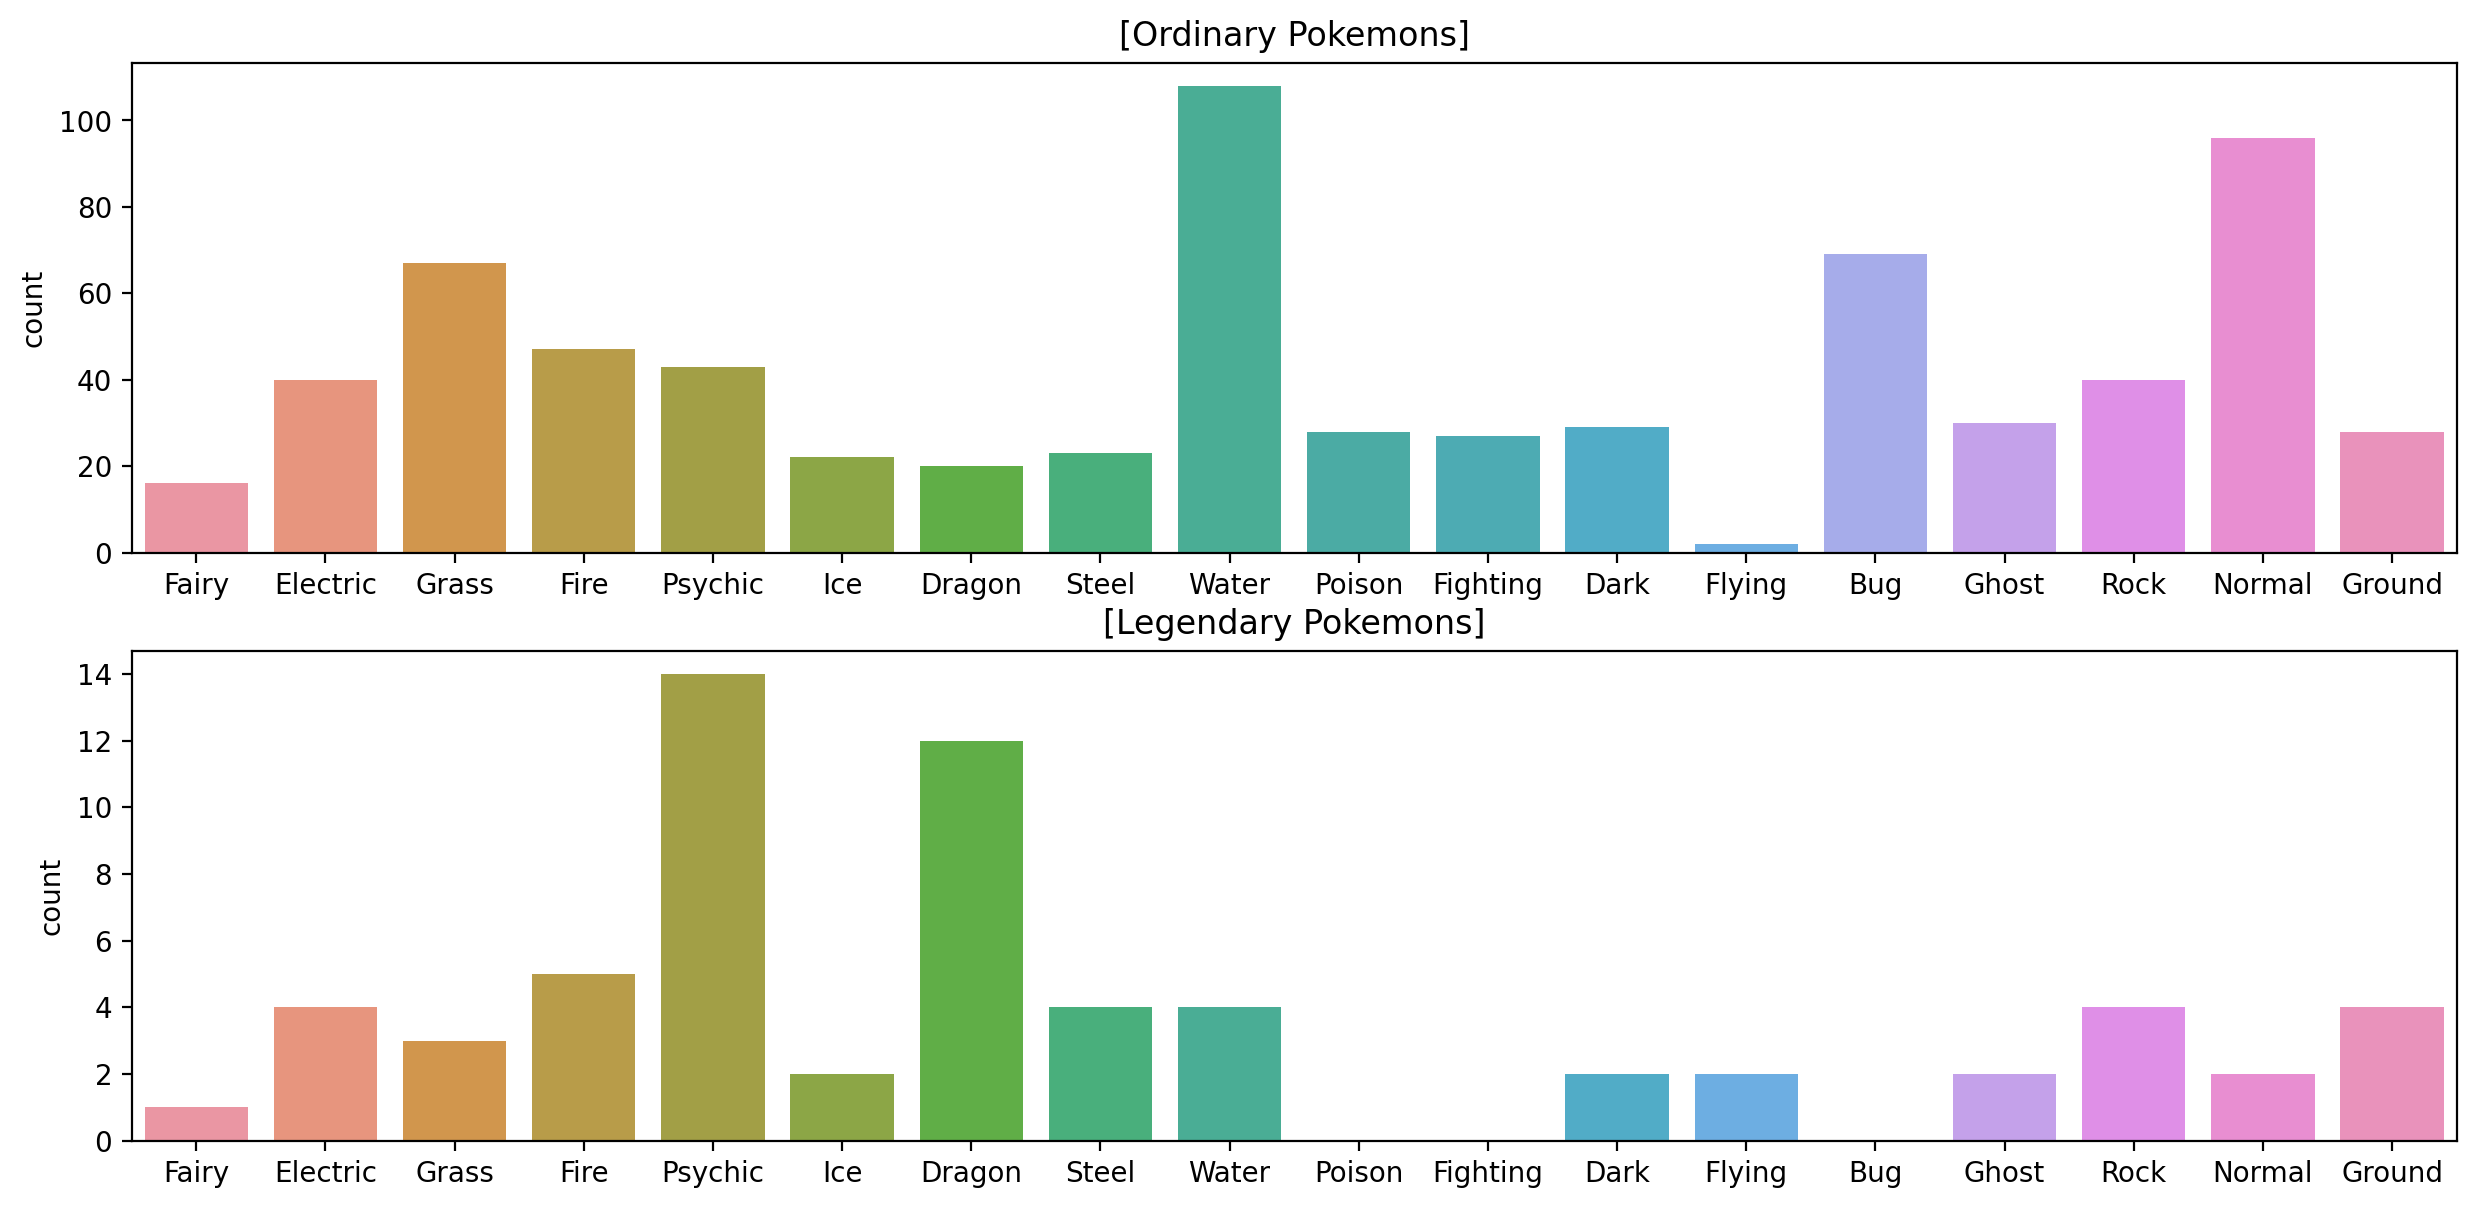

In [27]:
plt.figure(figsize=(15, 7))

plt.subplot(211)
sns.countplot(data=ordinary, x="Type 1", order=types).set_xlabel('')
plt.title("[Ordinary Pokemons]")

plt.subplot(212)
sns.countplot(data=legendary, x="Type 1", order=types).set_xlabel('')
plt.title("[Legendary Pokemons]")

plt.show()

[일반 포켓몬] 
- 전체 속성을 두루 가짐
- Water Normal 속성이 가장 많음

[전설의 포켓몬]
- Bug, Poison, Fighting 속성은 없음
- Psychic, Dragon 속성이 많음

In [29]:
# pivot table
# Type1별로 Legendary의 비율을 확인 - 비율 높은 순으로 정렬
pd.pivot_table(pokemon, index="Type 1", values="Legendary").sort_values(by=["Legendary"], ascending=False)

,Legendary
Type 1,
Flying,0.500000
Dragon,0.375000
Psychic,0.245614
Steel,0.148148
Ground,0.125000
Fire,0.096154
Electric,0.090909
Rock,0.090909
Ice,0.083333


- Type 1에서 Flying 속성을 가진 포켓몬은 높은 비율로 전설의 포켓몬

---
[Type 2 데이터 분포 plot]
- Countplot은 결측값 자동으로 제외

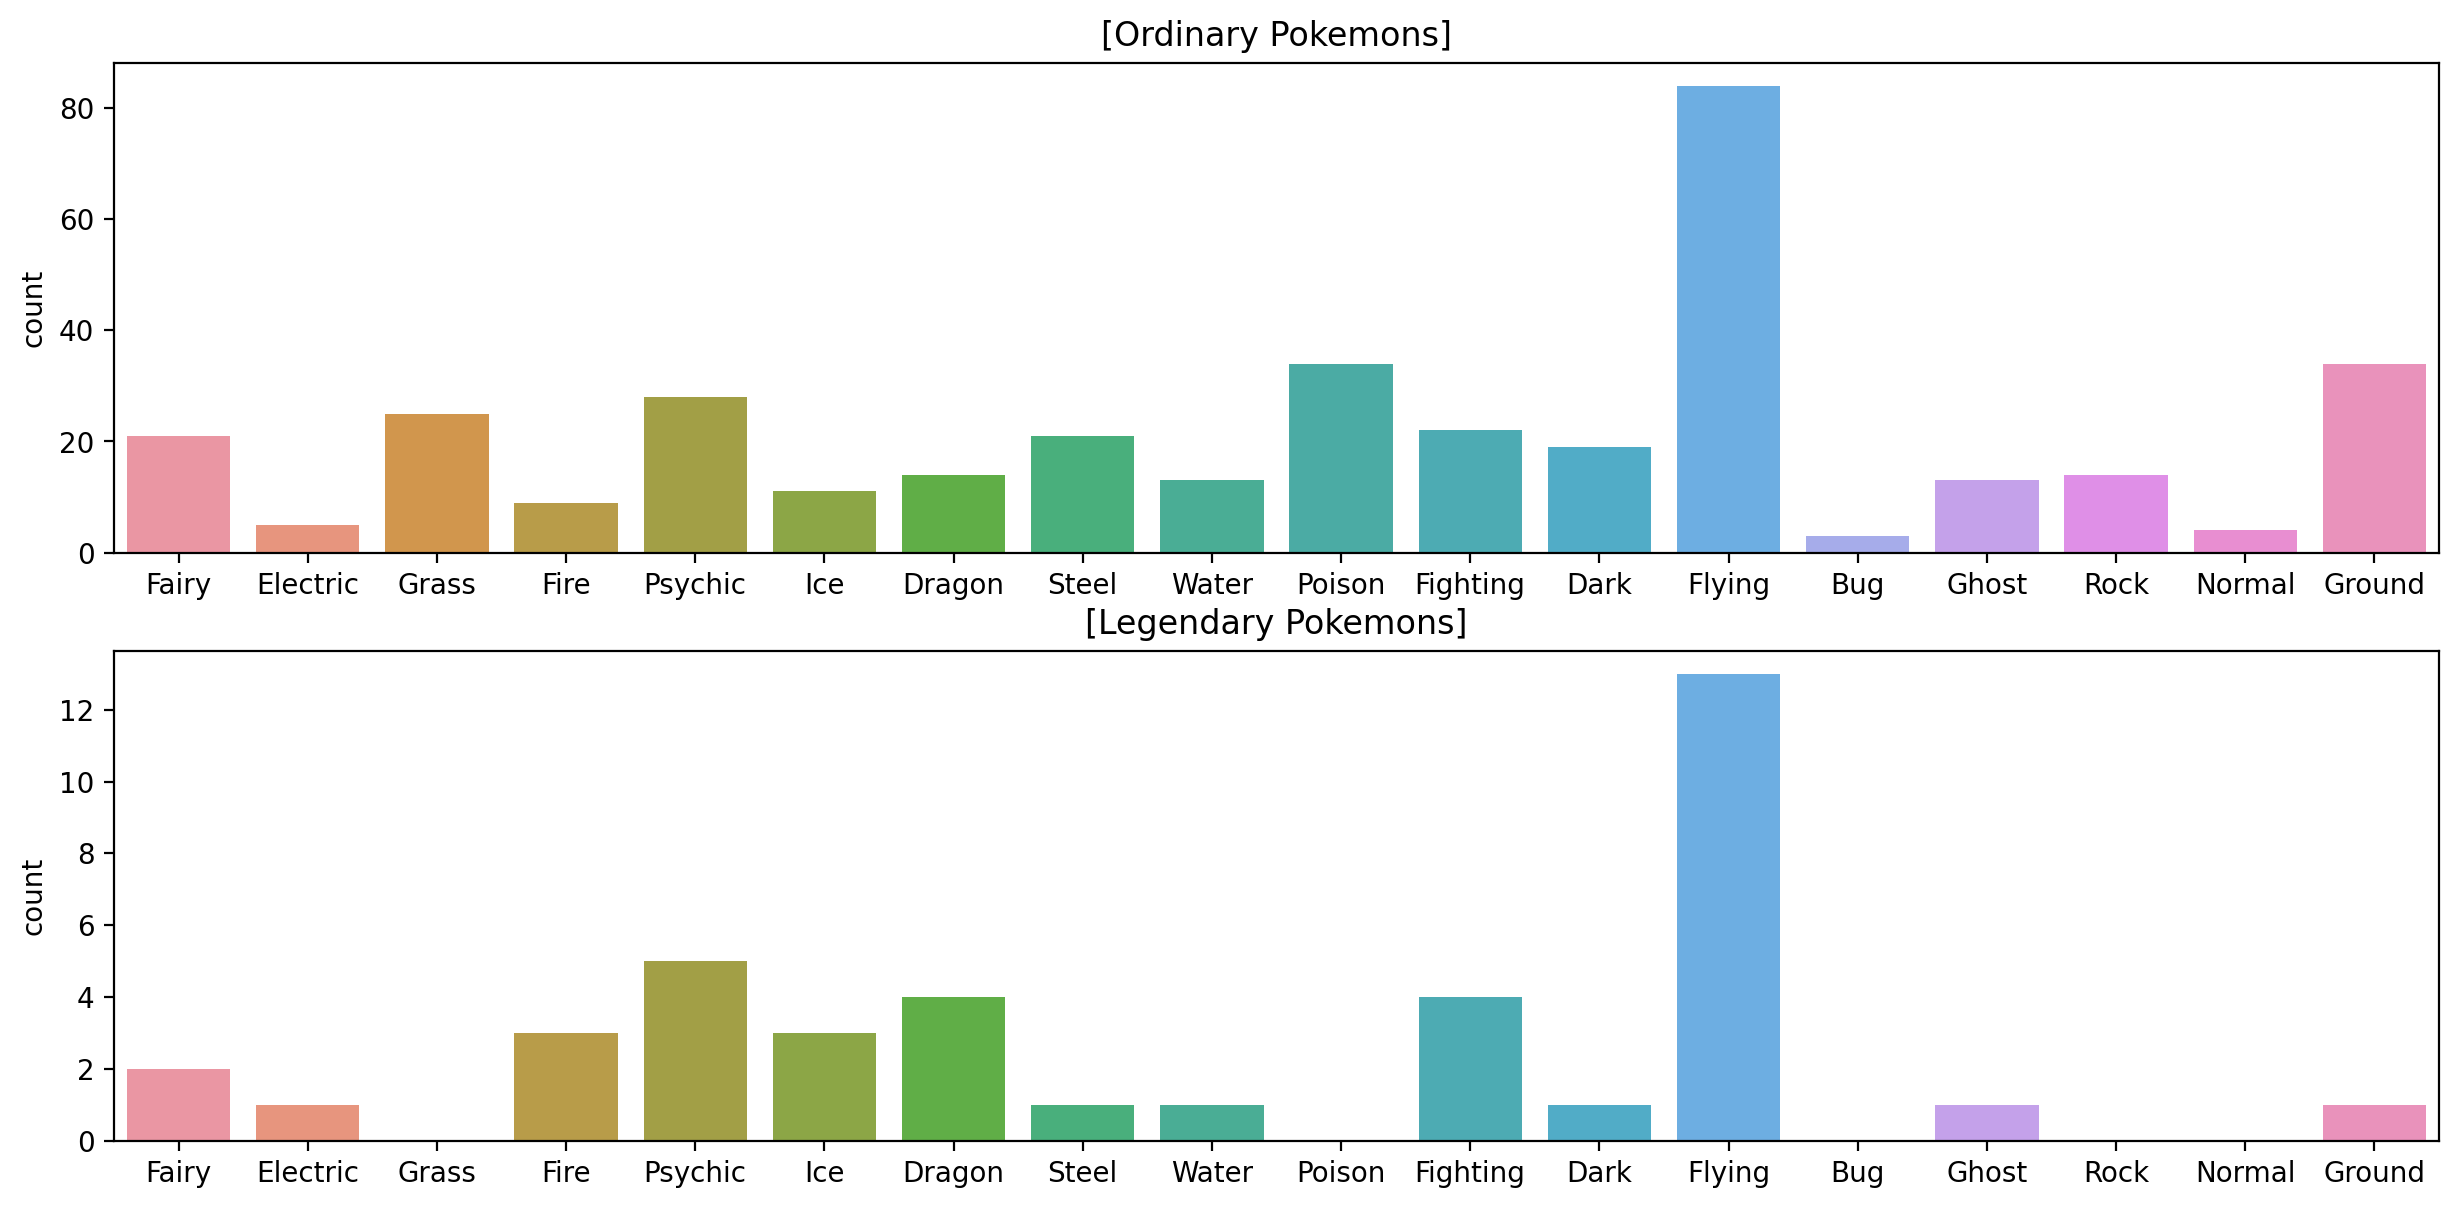

In [30]:
plt.figure(figsize=(15, 7))

plt.subplot(211)
sns.countplot(data=ordinary, x="Type 2", order=types).set_xlabel('')
plt.title("[Ordinary Pokemons]")

plt.subplot(212)
sns.countplot(data=legendary, x="Type 2", order=types).set_xlabel('')
plt.title("[Legendary Pokemons]")

plt.show()

In [32]:
# pivot table
# Type2별로 Legendary의 비율을 확인 - 비율 높은 순으로 정렬
pd.pivot_table(pokemon, index="Type 2", values="Legendary").sort_values(by=["Legendary"], ascending=False)

,Legendary
Type 2,
Fire,0.250000
Dragon,0.222222
Ice,0.214286
Electric,0.166667
Fighting,0.153846
Psychic,0.151515
Flying,0.134021
Fairy,0.086957
Water,0.071429


- Type 2는 Fire 속성을 가진 전설의 포켓몬 비율이 높음

---
[Total : 모든 스탯의 총합]
- 데이터셋에서 포켓몬은 총 6가지의 스탯 값을 가짐
- Total : 포켓몬이 가진 6가지 스탯의 총합

In [33]:
# 스탯 종류를 변수에 저장
stats = ["HP", "Attack", "Defense", "Sp. Atk", "Sp. Def", "Speed"]
stats

['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']

In [46]:
# 6개 스탯의 총합과 Total값이 맞는지 확인 - 1번 포켓몬(인덱스 0) 확인
print("#0 pokemon: ", pokemon.loc[0, "Name"])
print("total: ", int(pokemon.loc[0, "Total"]))
print("stats: ", list(pokemon.loc[0, stats]))
print("sum of all stats: ", sum(list(pokemon.loc[0, stats])))

#0 pokemon:  Bulbasaur
total:  318
stats:  [45, 49, 49, 65, 65, 45]
sum of all stats:  318


In [47]:
# 전체 포켓몬의 Total 값이 stats의 총합과 같은지 확인
# 'pokemon['Total'].values'와 'pokemon[stats].values의 총합'이 같은 포켓몬의 수를 확인
stats_sum = pokemon[stats].values.sum(axis=1)
sum(pokemon['Total'].values == stats_sum)

800

- 전체 포켓몬의 Total 값은 제대뢰 된 정보!
    - stats의 총합과 같음

---
[Total값에 따른 분포 plot]

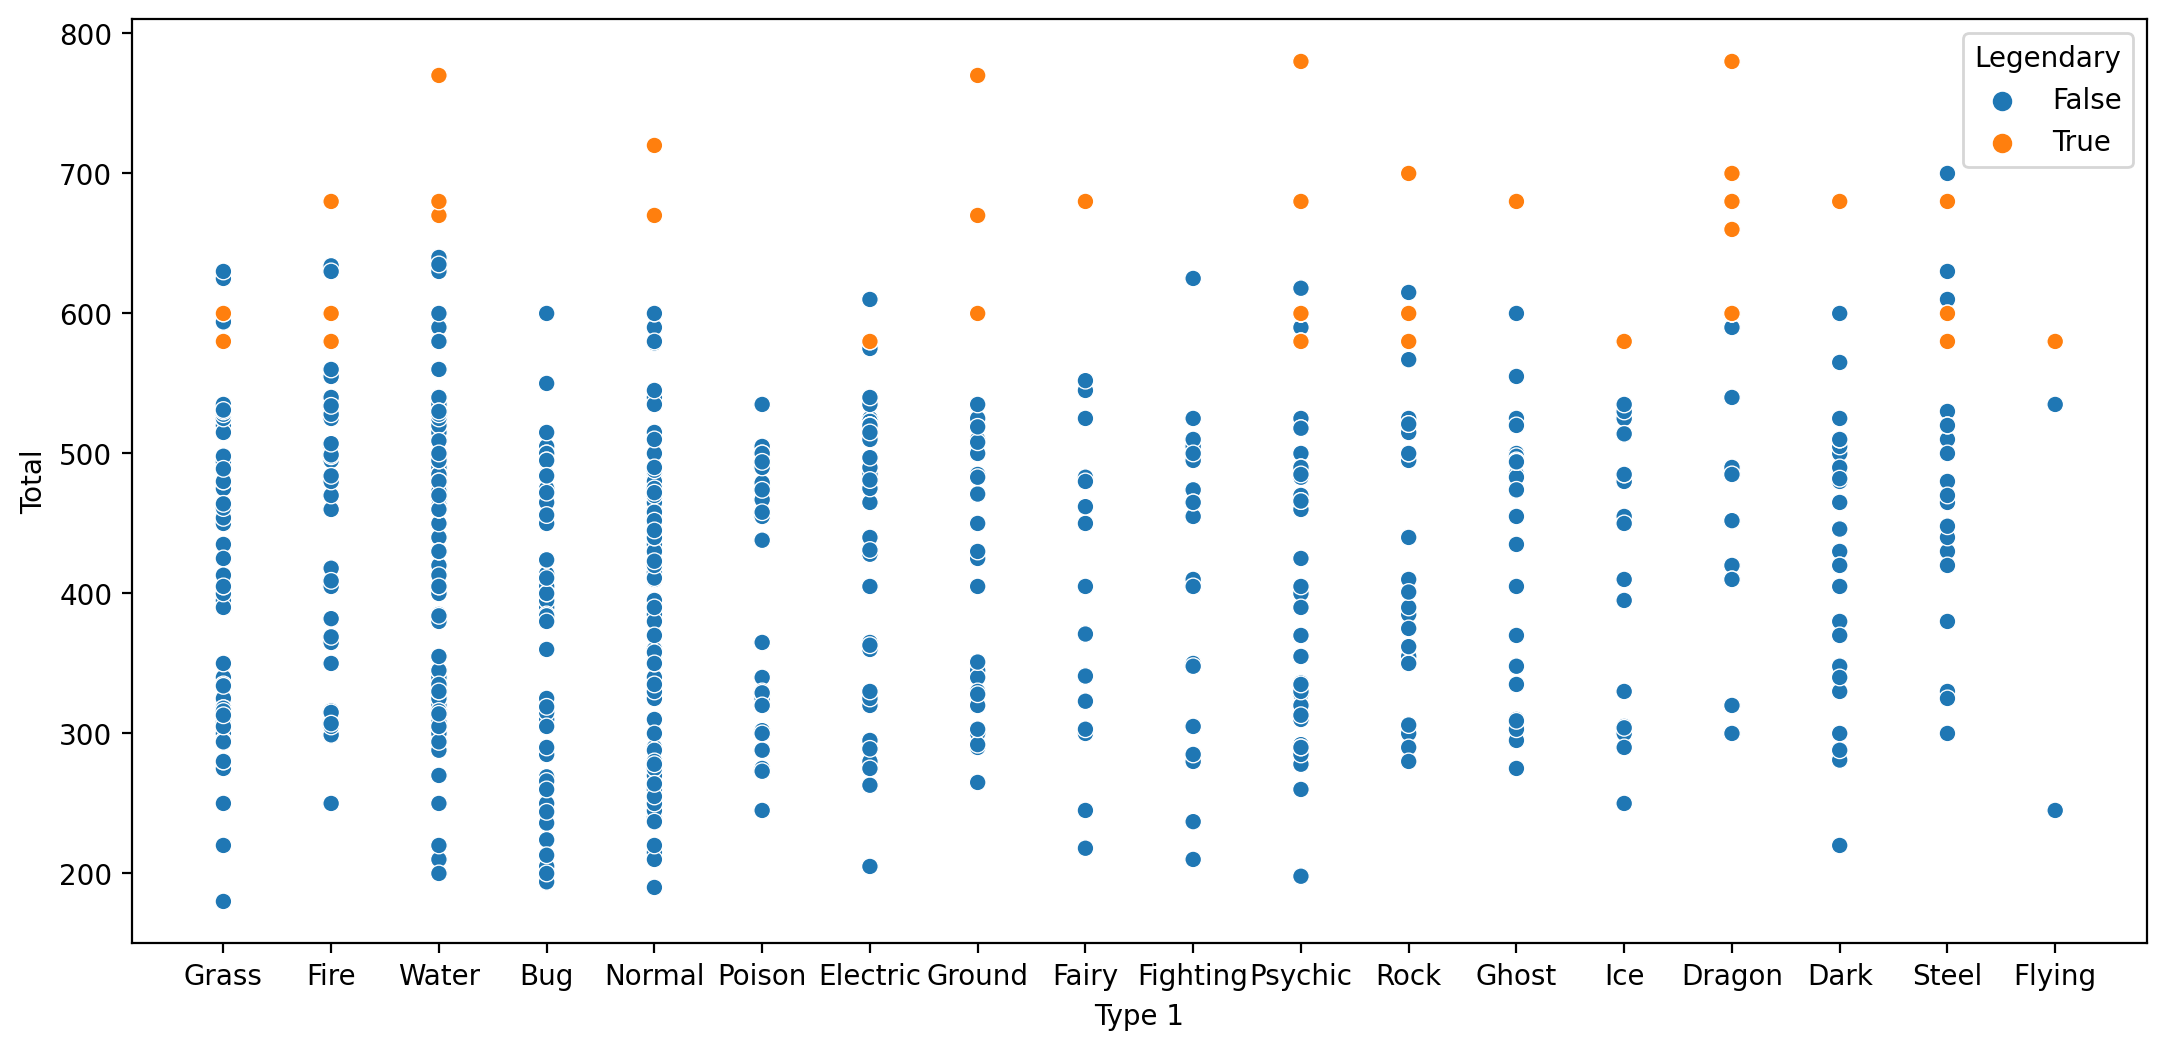

In [48]:
# Total - Legendary 관계 확인
fig, ax = plt.subplots()
fig.set_size_inches(13, 6)  # 화면 해상도에 따라 그래프 크기를 조정해 주세요.

sns.scatterplot(data=pokemon, x="Type 1", y="Total", hue="Legendary")
plt.show()

- 전설의 포켓몬은 Total 값도 높음

---
[세부 stat 확인]
- 세부스탯: HP, Attack, Defense, Sp. Atk, Sp. Def, Speed

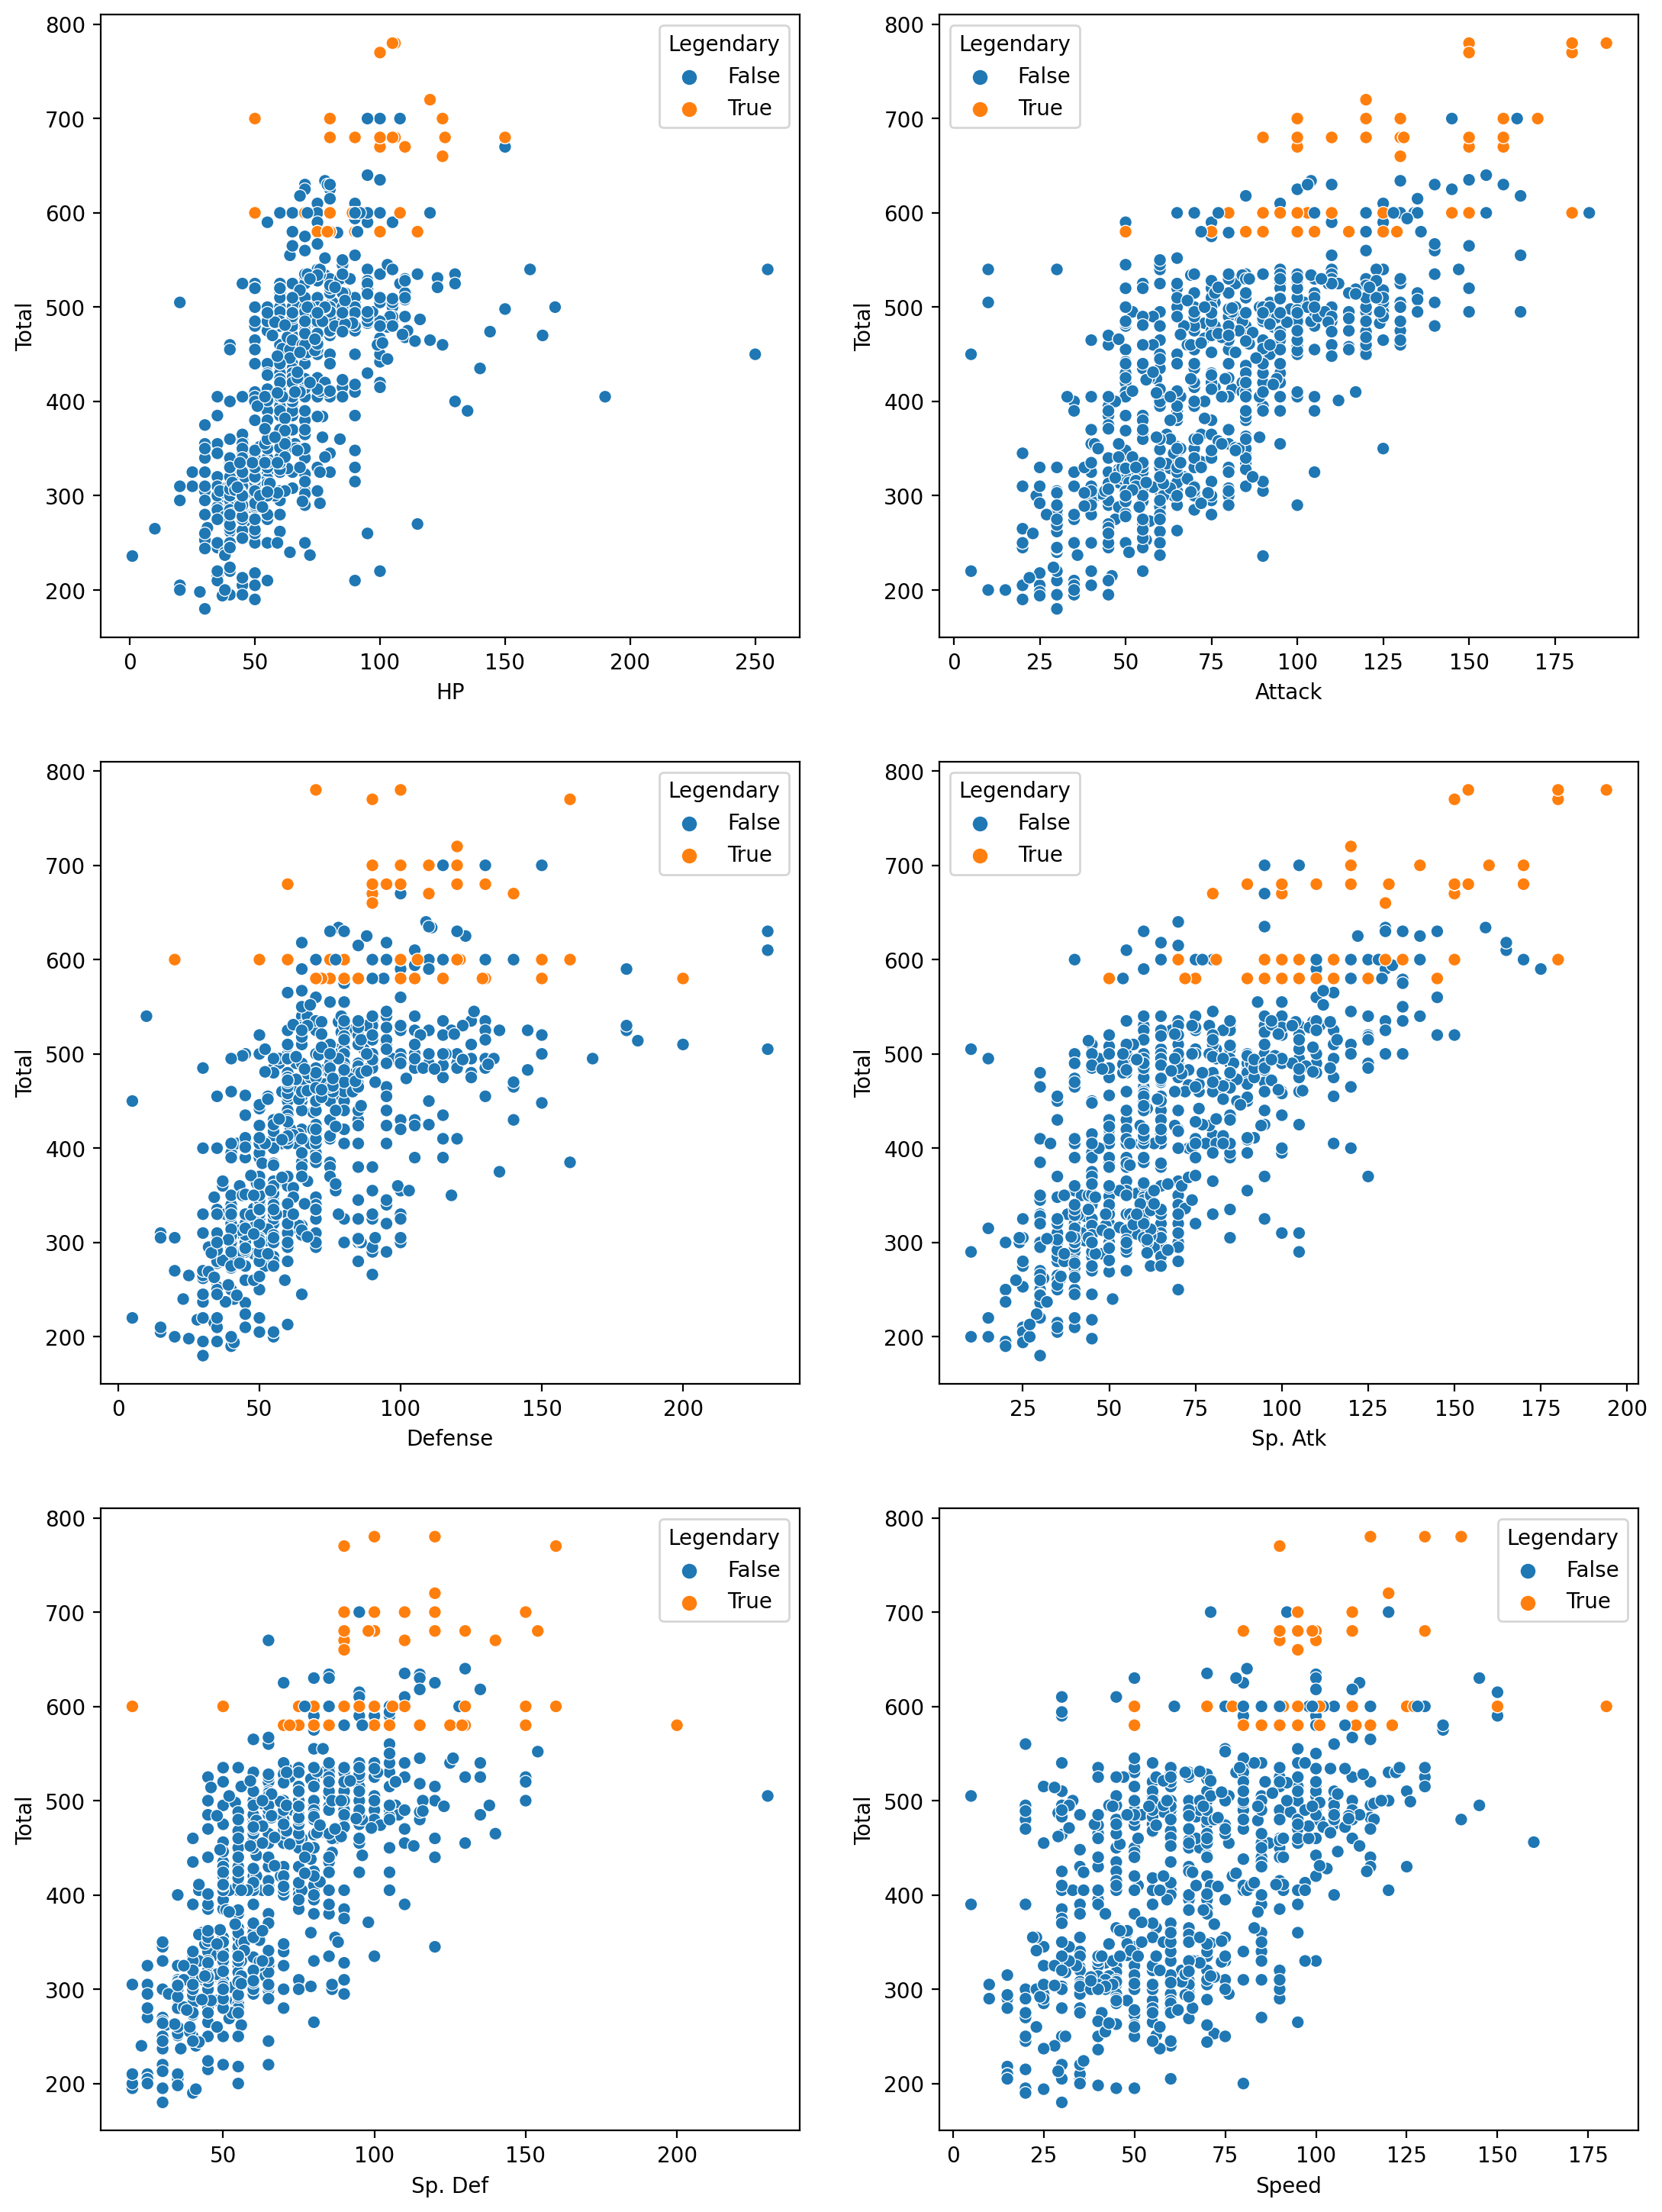

In [50]:
# 세부 stat 분포 확인
# 각각의 stat에 대한 scatter plot을 6개의 subplot으로 표현

figure, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(nrows=3, ncols=2)
figure.set_size_inches(13, 18)  # 화면 해상도에 따라 그래프 크기를 조정해 주세요.

# "HP" 스탯의 scatter plot
sns.scatterplot(data=pokemon, y="Total", x="HP", hue="Legendary", ax=ax1)

# "Attack" 스탯의 scatter plot
sns.scatterplot(data=pokemon, y="Total", x="Attack", hue="Legendary", ax=ax2)


# "Defense" 스탯의 scatter plot
sns.scatterplot(data=pokemon, y="Total", x="Defense", hue="Legendary", ax=ax3)

# "Sp. Atk" 스탯의 scatter plot
sns.scatterplot(data=pokemon, y="Total", x="Sp. Atk", hue="Legendary", ax=ax4)

# "Sp. Def" 스탯의 scatter plot
sns.scatterplot(data=pokemon, y="Total", x="Sp. Def", hue="Legendary", ax=ax5)

# "Speed" 스탯의 scatter plot
sns.scatterplot(data=pokemon, y="Total", x="Speed", hue="Legendary", ax=ax6)

plt.show()

`HP, Defense, Sp. Def`
- 전설의 포켓몬은 주로 높은 스탯을 갖지만, 이 세 가지에서는 일반 포켓몬이 전설의 포켓몬보다 특히 높은 몇몇 포켓몬이 있음
- 그러나 그 포켓몬들도 Total 값은 특별히 높지 않은 것으로 보아 특정 스탯만 특별히 높은, 즉 특정 속성에 특화된 포켓몬들로 보임 (ex. 방어형, 공격형 등)

`Attack, Sp. Atk, Speed`
- 이 세 가지 스탯은 Total과 거의 비례
- 전설의 포켓몬이 각 스탯의 최대치를 차지하고 있음

---
[Generation : 포켓몬의 세대]
- 현재 데이터셋에는 1~6세대의 포켓몬이 존재

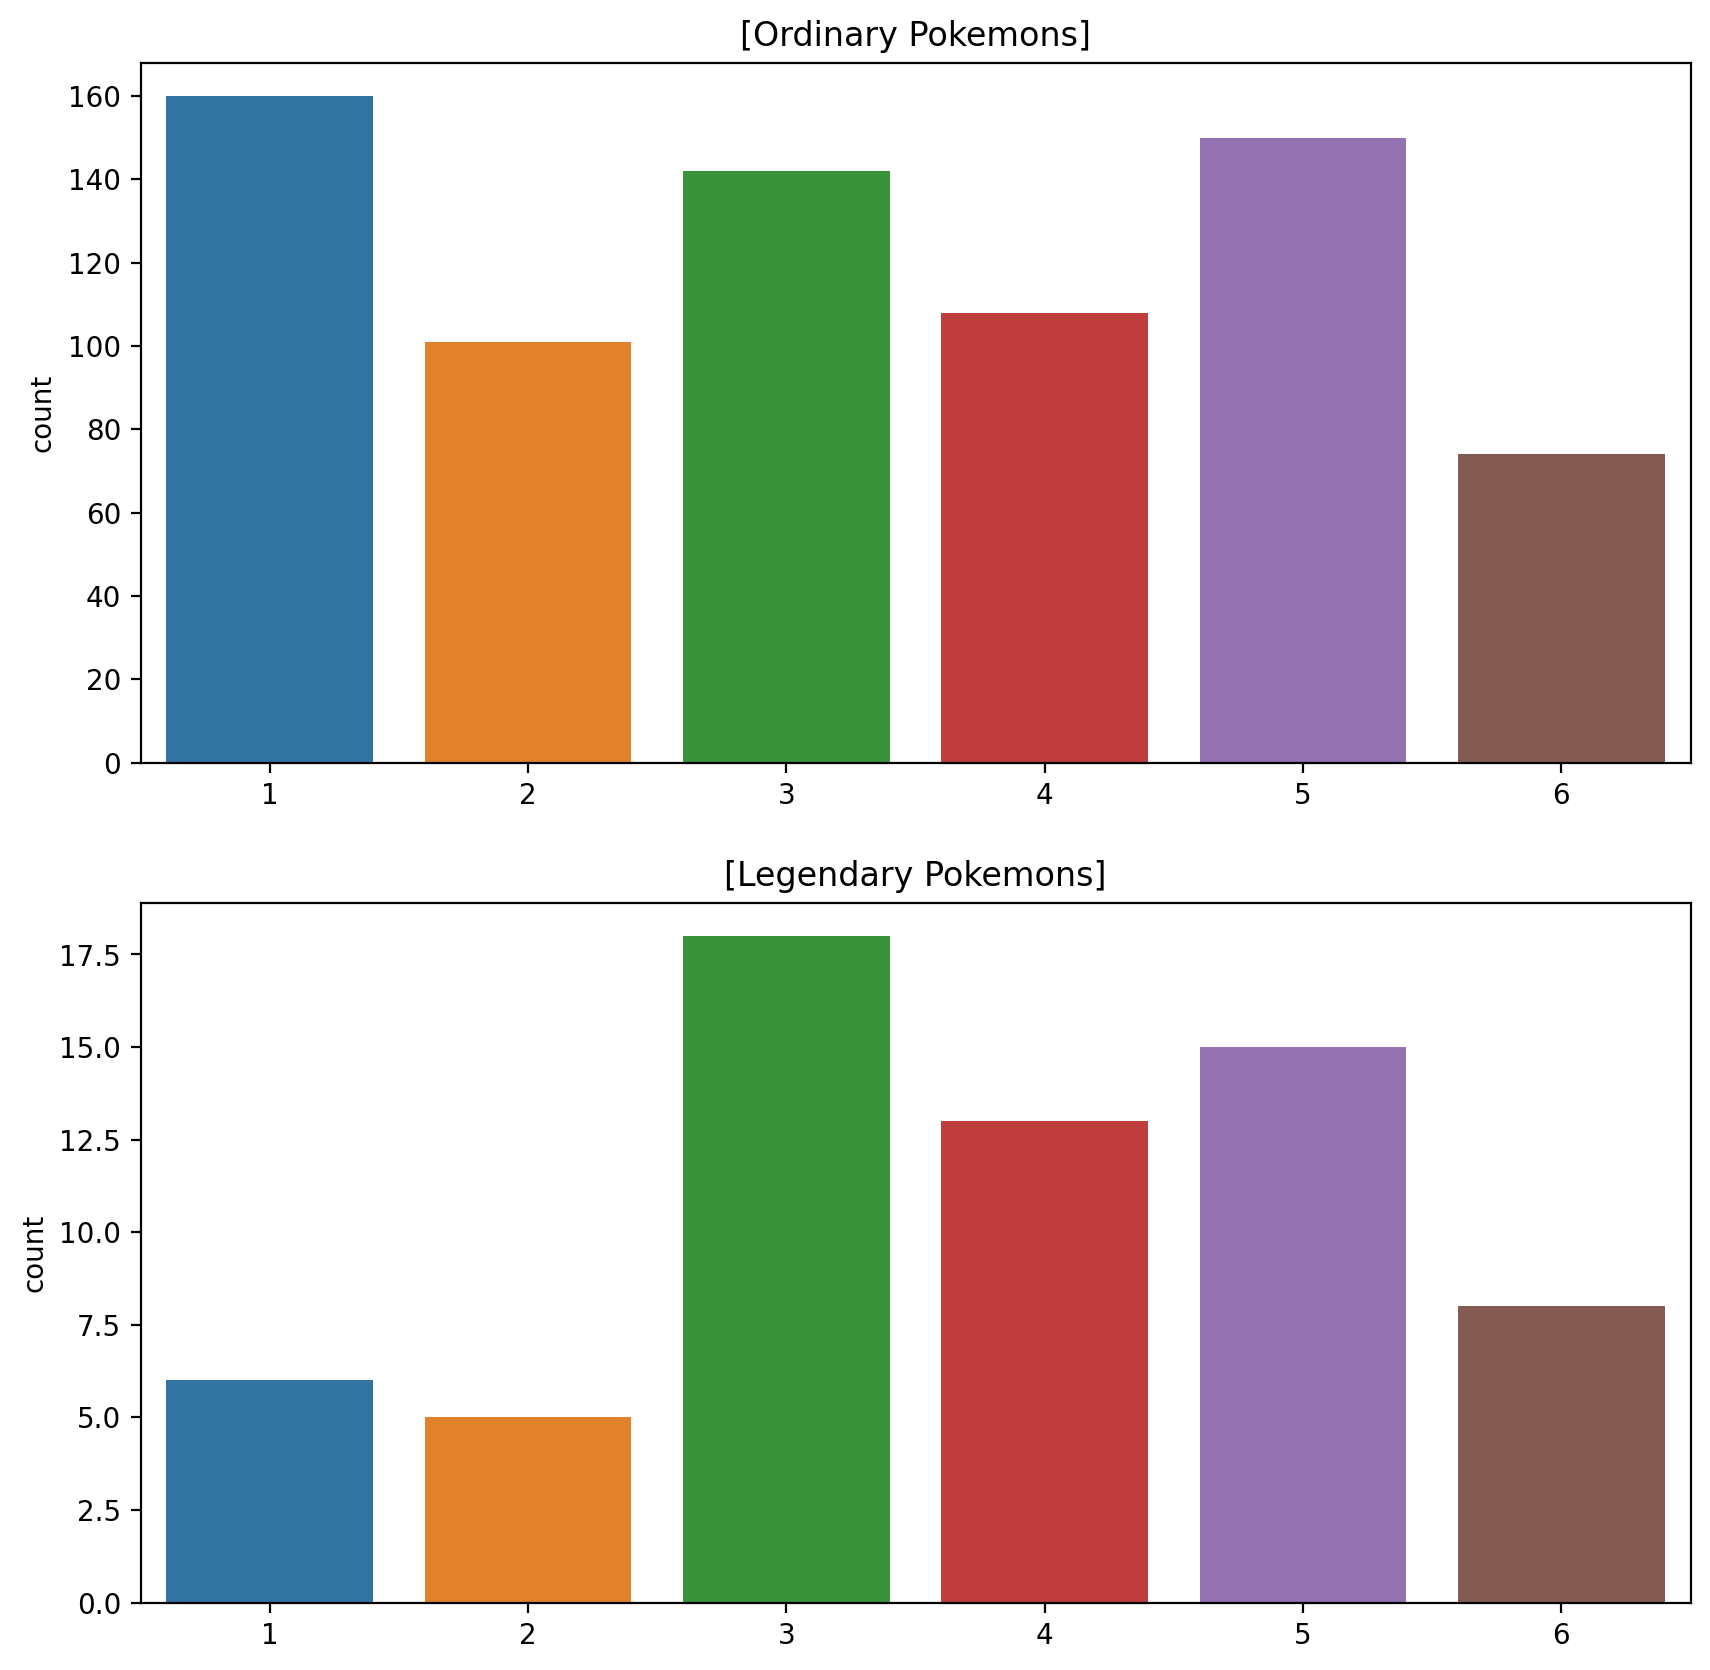

In [52]:
plt.figure(figsize=(10, 10))   

plt.subplot(211)
sns.countplot(data=ordinary, x="Generation").set_xlabel('')
plt.title("[Ordinary Pokemons]")
plt.subplot(212)
sns.countplot(data=legendary, x="Generation").set_xlabel('')
plt.title("[Legendary Pokemons]")
plt.show()

---
> 목표는 전설의 포켓몬을 일반 포켓몬에서 분류하는것!   
> 각 포켓몬이 갖는 특징을 세분화해서 확인
> 
[전설의 포켓몬의 Total 값]

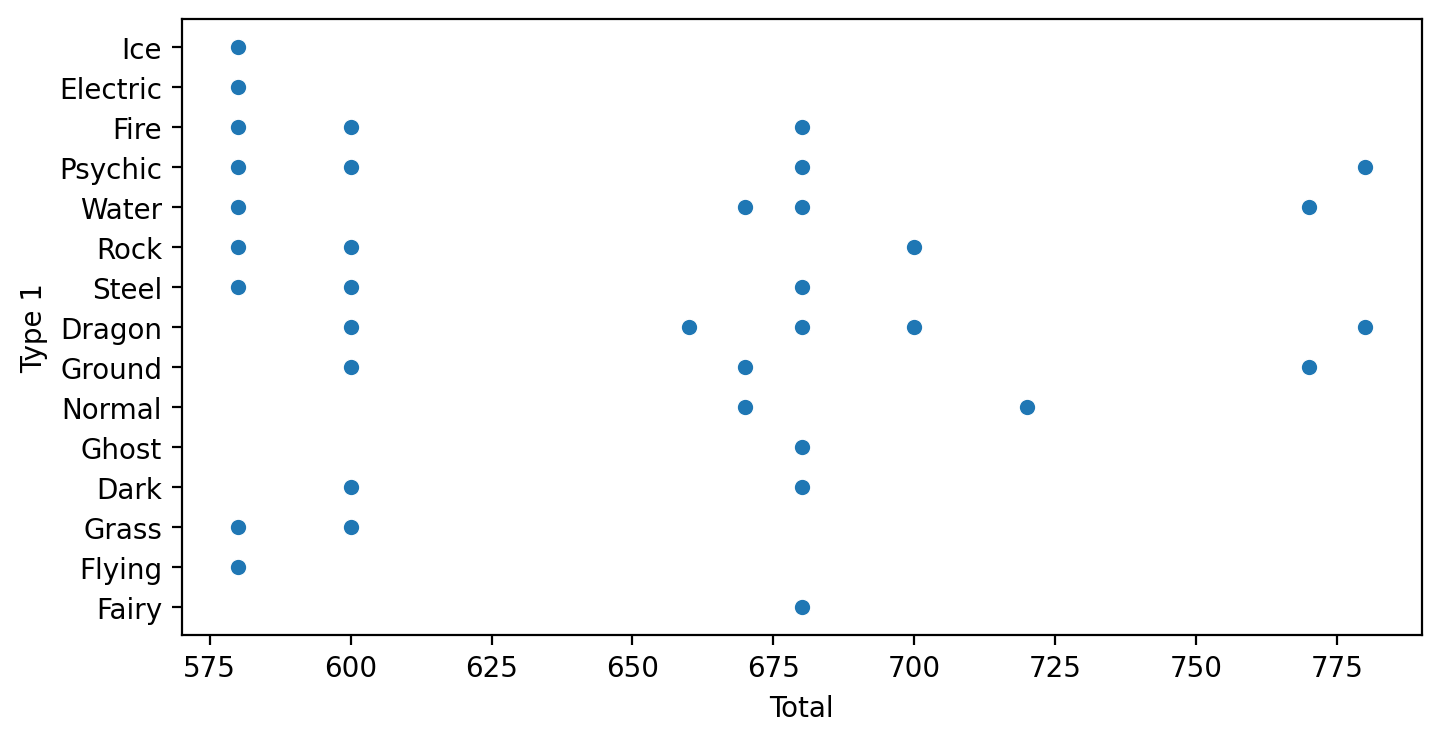

In [53]:
# 전설의 포켓몬들의 Total 값을 속성(Type 1)별로 확인
fig, ax = plt.subplots()
fig.set_size_inches(8, 4)

sns.scatterplot(data=legendary, y="Type 1", x="Total")
plt.show()

- 전설의 포켓몬들의 Total값들이 600과 같은 특정한 값에 몰려있음

In [54]:
# 전설의 포켓몬이 갖고 있는 Total 값 종류 확인
print(sorted(list(set(legendary["Total"]))))

[580, 600, 660, 670, 680, 700, 720, 770, 780]


- 9 종류 Total값만 가지고 있음
  - 최소 580개, 최대 780개

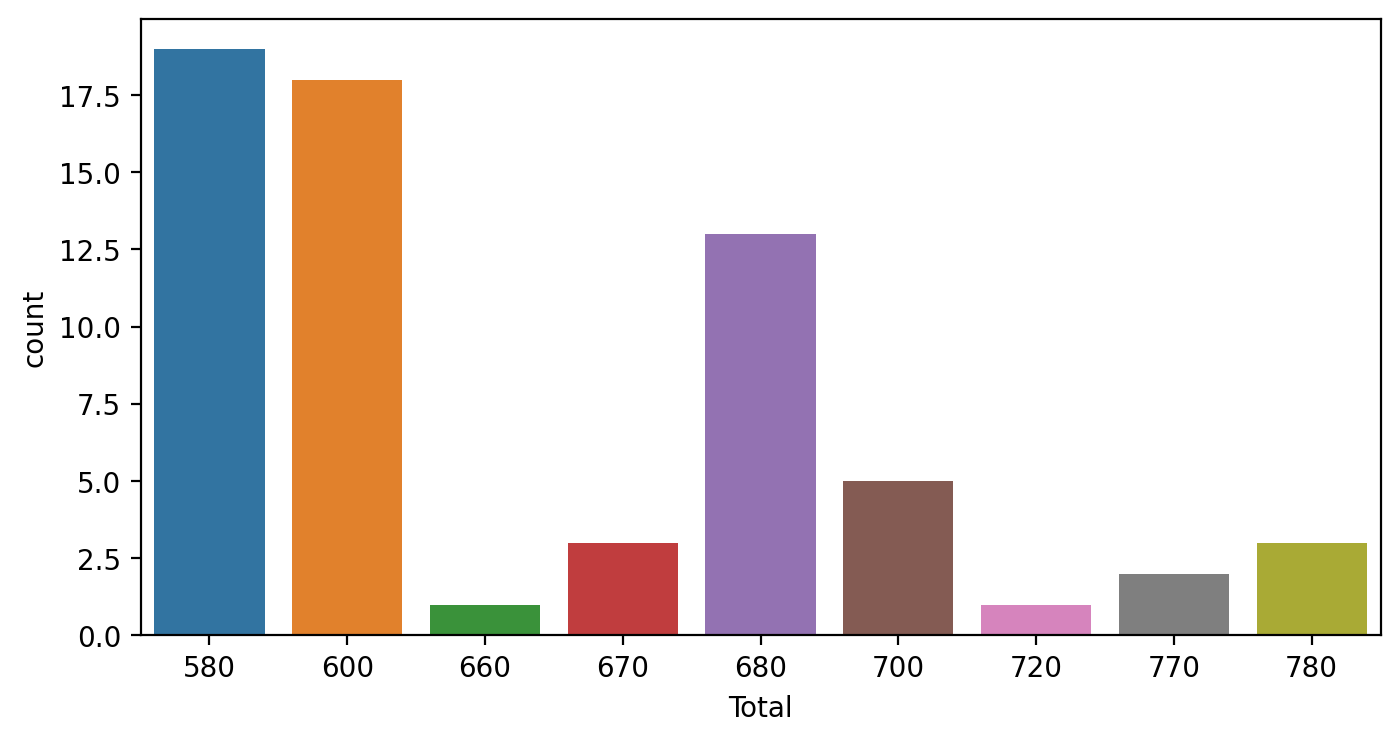

In [56]:
# 각 값의 포켓몬 수 그래프 확인
fig, ax = plt.subplots()
fig.set_size_inches(8, 4)

sns.countplot(data=legendary, x="Total")
plt.show()

In [61]:
# 65명의 전설의 포켓몬 중 7.22명은 같은 Total stat을 가짐
round(65 / 9, 2)

7.22

In [63]:
# 일반 포켓몬 Total 값 종류 확인
print(sorted(list(set(ordinary["Total"]))))

# 개수 확인
print("총", len(sorted(list(set(ordinary["Total"])))))

# 735명의 일반포켓몬 중 3.77명은 같은 Total stat을 가짐
round(735 / 195, 2)

[180, 190, 194, 195, 198, 200, 205, 210, 213, 215, 218, 220, 224, 236, 237, 240, 244, 245, 250, 251, 253, 255, 260, 262, 263, 264, 265, 266, 269, 270, 273, 275, 278, 280, 281, 285, 288, 289, 290, 292, 294, 295, 299, 300, 302, 303, 304, 305, 306, 307, 308, 309, 310, 313, 314, 315, 316, 318, 319, 320, 323, 325, 328, 329, 330, 334, 335, 336, 340, 341, 345, 348, 349, 350, 351, 352, 355, 358, 360, 362, 363, 365, 369, 370, 371, 375, 380, 382, 384, 385, 390, 395, 400, 401, 405, 409, 410, 411, 413, 414, 415, 418, 420, 423, 424, 425, 428, 430, 431, 435, 438, 440, 442, 445, 446, 448, 450, 452, 454, 455, 456, 458, 460, 461, 462, 464, 465, 466, 467, 468, 470, 471, 472, 473, 474, 475, 479, 480, 481, 482, 483, 484, 485, 487, 488, 489, 490, 494, 495, 497, 498, 499, 500, 505, 507, 508, 509, 510, 514, 515, 518, 519, 520, 521, 523, 525, 528, 530, 531, 534, 535, 540, 545, 550, 552, 555, 560, 565, 567, 575, 579, 580, 590, 594, 600, 610, 615, 618, 625, 630, 634, 635, 640, 670, 700]
총 195


3.77

#### 여기까지 정리1
-  Total값의 다양성은 일반 포켓몬이 전설의 포켓몬보다 두 배 가까이 됨
    -  즉 전설의 포켓몬의 Total값은 다양하지 않음
    > 한 포켓몬의 Total 값이 전설의 포켓몬의 값에 포함되는지가 **전설의 포켓몬**임을 결정하는데 영향을 줌

- 전설의 포켓몬의 Total 값 중에는 일반 포켓몬이 가지지 못하는 Total값이 존재
    - e.g. 680, 720, 770, 780
    > Total 값은 전설의 포켓몬인지 아닌지를 결정하는 데에 영향을 줌

##### => 즉, Total값은 legendary인지 아닌지를 예측하는 데에 중요한 컬럼
---

[힌트] `전설의 포켓몬은 특정 단어가 들어가 있는 이름, 긴 이름을 가진 경우가 많다`

In [64]:
# 특정 단어가 들어가 있는 이름 확인
# 비슷한 이름을 가진 포켓몬들의 행 -> pd.concat으로 합치기
n1, n2, n3, n4, n5 = legendary[3:6], legendary[14:24], legendary[25:29], legendary[46:50], legendary[52:57]
names = pd.concat([n1, n2, n3, n4, n5]).reset_index(drop=True)
names

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,150,Mewtwo,Psychic,NaN,680,106,110,90,154,90,130,1,True
1,150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True
2,150,MewtwoMega Mewtwo Y,Psychic,NaN,780,106,150,70,194,120,140,1,True
3,380,Latias,Dragon,Psychic,600,80,80,90,110,130,110,3,True
4,380,LatiasMega Latias,Dragon,Psychic,700,80,100,120,140,150,110,3,True
5,381,Latios,Dragon,Psychic,600,80,90,80,130,110,110,3,True
6,381,LatiosMega Latios,Dragon,Psychic,700,80,130,100,160,120,110,3,True
7,382,Kyogre,Water,NaN,670,100,100,90,150,140,90,3,True
8,382,KyogrePrimal Kyogre,Water,NaN,770,100,150,90,180,160,90,3,True
9,383,Groudon,Ground,NaN,670,100,150,140,100,90,90,3,True


In [65]:
# 이름에 forme가 들어가는 여러 가지 전설의 포켓몬
formes = names[13:23]
formes

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
13,386,DeoxysNormal Forme,Psychic,NaN,600,50,150,50,150,50,150,3,True
14,386,DeoxysAttack Forme,Psychic,NaN,600,50,180,20,180,20,150,3,True
15,386,DeoxysDefense Forme,Psychic,NaN,600,50,70,160,70,160,90,3,True
16,386,DeoxysSpeed Forme,Psychic,NaN,600,50,95,90,95,90,180,3,True
17,641,TornadusIncarnate Forme,Flying,NaN,580,79,115,70,125,80,111,5,True
18,641,TornadusTherian Forme,Flying,NaN,580,79,100,80,110,90,121,5,True
19,642,ThundurusIncarnate Forme,Electric,Flying,580,79,115,70,125,80,111,5,True
20,642,ThundurusTherian Forme,Electric,Flying,580,79,105,70,145,80,101,5,True
21,645,LandorusIncarnate Forme,Ground,Flying,600,89,125,90,115,80,101,5,True
22,645,LandorusTherian Forme,Ground,Flying,600,89,145,90,105,80,91,5,True


-> 이름에 formes 들어가면 전설의 포켓몬!

---
긴 이름 찾기

In [74]:
# 이름 길이 컬럼 추가
# 전설의 포켓몬
legendary["name_count"] = legendary["Name"].apply(lambda i: len(i))    
print("Legendary")
display(legendary.head())



# 일반포켓몬
ordinary["name_count"] = ordinary["Name"].apply(lambda i: len(i))  
print("Ordinary")
display(ordinary.head())

Legendary


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count
0,144,Articuno,Ice,Flying,580,90,85,100,95,125,85,1,True,8
1,145,Zapdos,Electric,Flying,580,90,90,85,125,90,100,1,True,6
2,146,Moltres,Fire,Flying,580,90,100,90,125,85,90,1,True,7
3,150,Mewtwo,Psychic,NaN,680,106,110,90,154,90,130,1,True,6
4,150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True,19


Ordinary


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,9
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,7
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,8
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,21
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,10


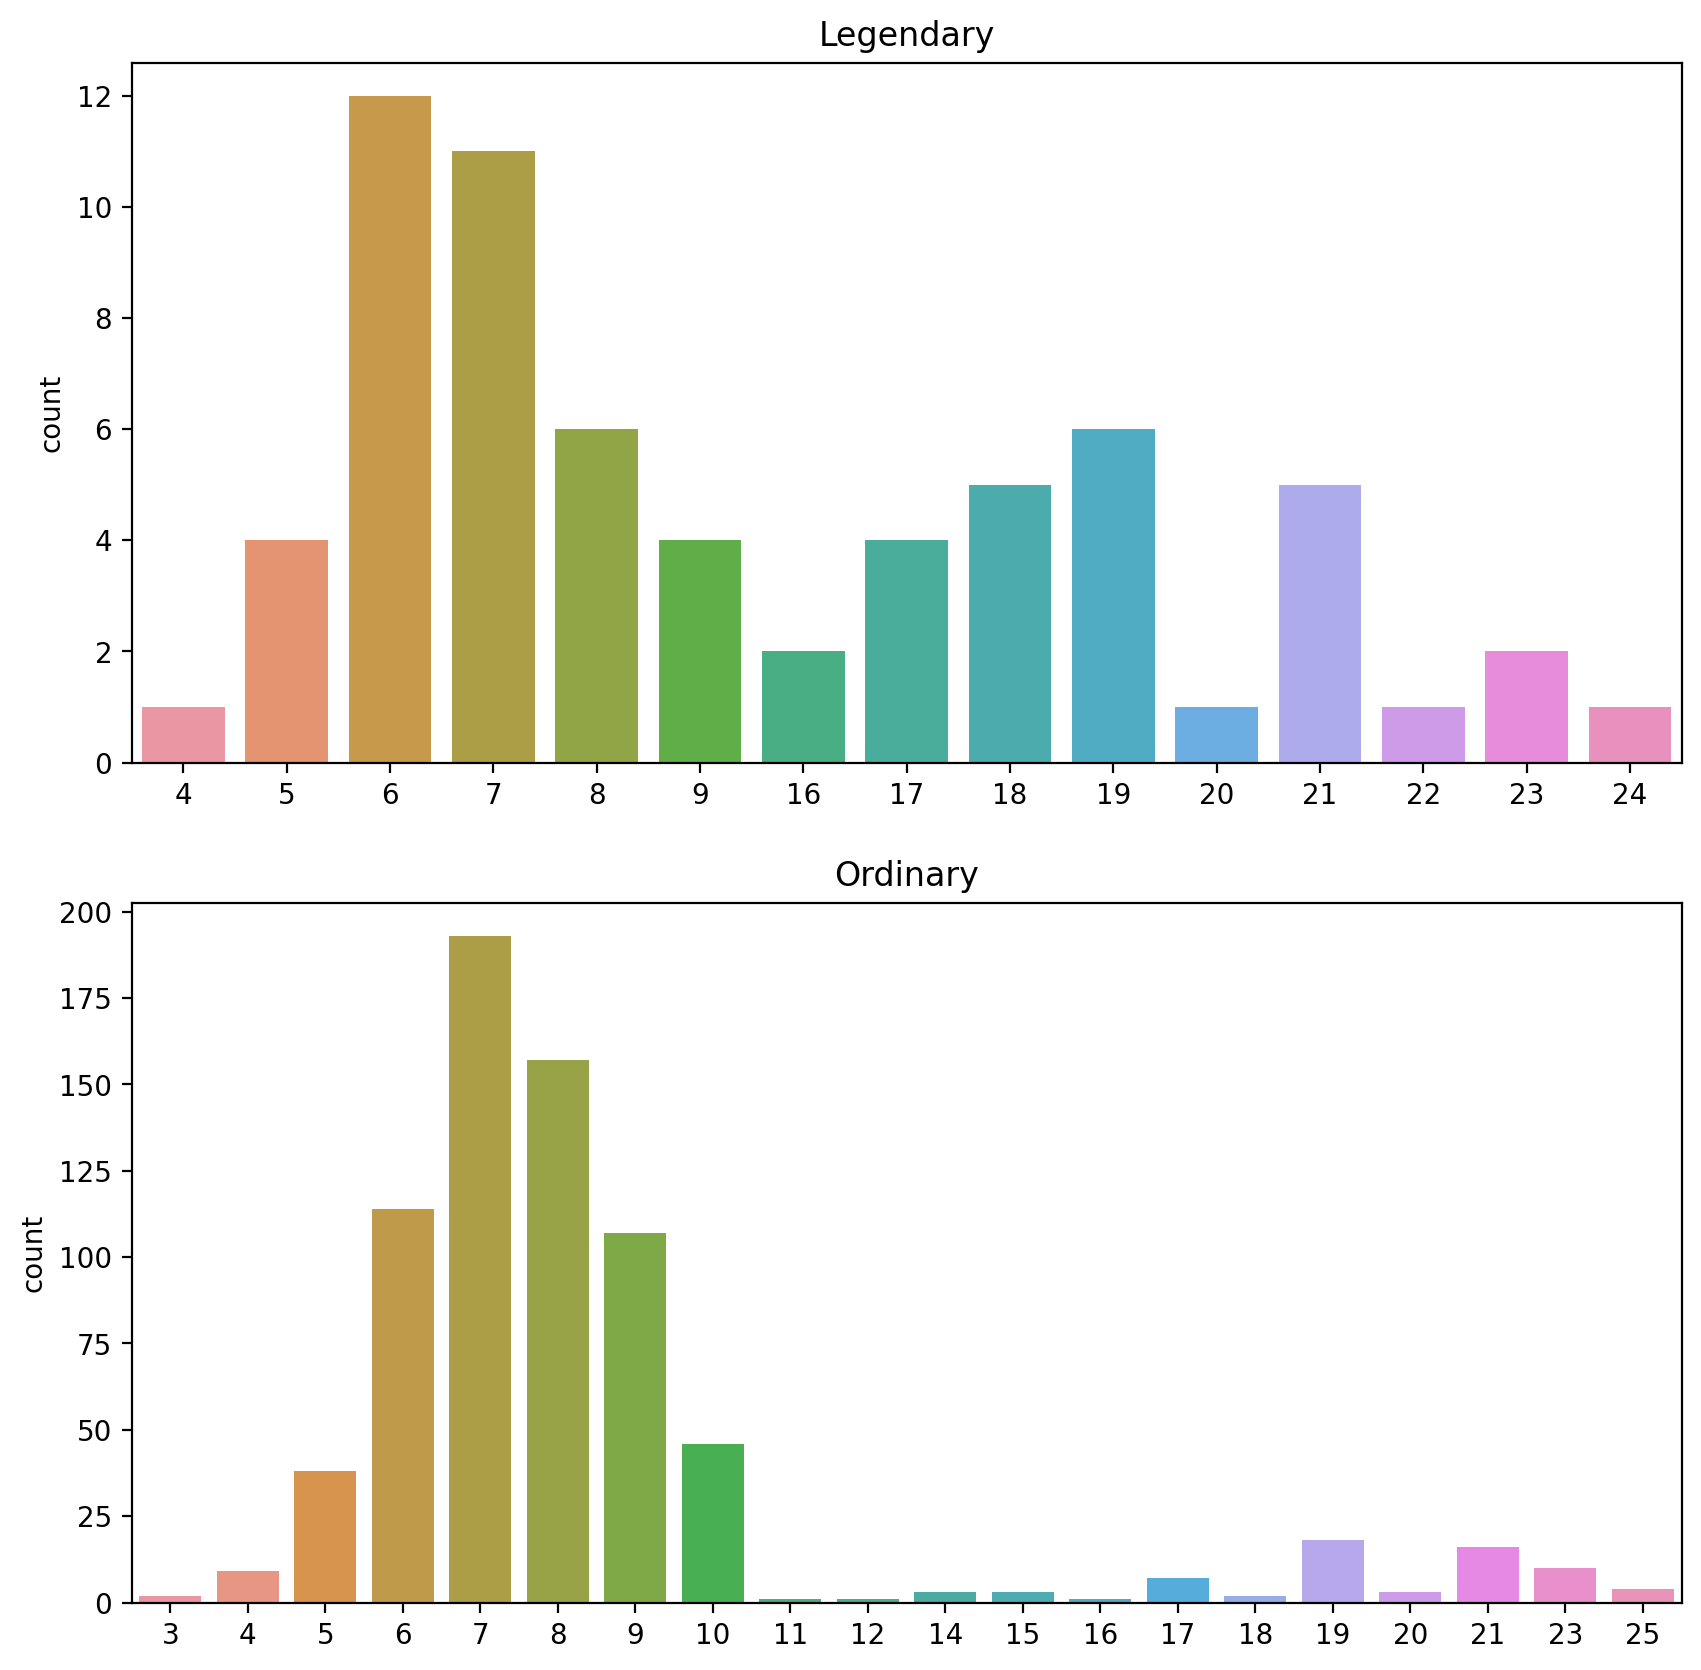

In [76]:
# name_count 컬럼 그래프 확인
plt.figure(figsize=(10, 10))   # 화면 해상도에 따라 그래프 크기를 조정해 주세요.

plt.subplot(211)
sns.countplot(data=legendary, x="name_count").set_xlabel('')
plt.title("Legendary")
plt.subplot(212)
sns.countplot(data=ordinary, x="name_count").set_xlabel('')
plt.title("Ordinary")
plt.show()

In [78]:
# 전설의 포켓몬 이름 길이가 10 이상인 확률
print(round(len(legendary[legendary["name_count"] > 9]) / len(legendary) * 100, 2), "%")

# 일반포켓몬 이름 길이가 10 이상인 확률
print(round(len(ordinary[ordinary["name_count"] > 9]) / len(ordinary) * 100, 2), "%")

41.54 %
15.65 %


#### 여기까지 정리2

- 만약 "Latios"가 전설의 포켓몬이라면, "%%% Latios" 또한 전설의 포켓몬이다!
- 적어도 전설의 포켓몬에서 높은 빈도를 보이는 이름들의 모임이 존재한다!
- 전설의 포켓몬은 긴 이름을 가졌을 확률이 높다!

---
### 3.데이터 전처리
#### 1) 범주형데이터 전처리 1
(1) 이름 길이 : name_count 컬럼을 생성 후 길이가 10을 넘는지 아닌지에 대한 categorical 컬럼을 생성   

In [79]:
# 전체 포켓몬 데이터에 이름 길이가 10이상인 데이터 컬럼 추가 : name_count
pokemon["name_count"] = pokemon["Name"].apply(lambda i: len(i))
pokemon.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,9
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,7
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,8
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,21
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,10


In [80]:
# long_name 컬럼 추가
# name_count >= 10 : True, name_count < 10 : False
pokemon["long_name"] = pokemon["name_count"] >= 10
pokemon.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count,long_name
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,9,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,7,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,8,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,21,True
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,10,True


- 모델학습때 name_count / lone_name 모두 활용해서 어떤 값이 더 효과적인지 확인

---

(2) 토큰 추출 : legendary 포켓몬에서 많이 등장하는 토큰을 추려내고 토큰 포함 여부를 원-핫 인코딩(One-Hot Encoding)으로 처리
- 이름에 어떤 토큰이 있으면 전설의 포켓몬일 확률이 높은지 확인

`포켓몬 이름 타입`
- 한 단어면 ex. Venusaur
- 두 단어이고, 앞 단어는 두 개의 대문자를 가지며 대문자를 기준으로 두 부분으로 나뉘는 경우 ex. VenusaurMega Venusaur
- 이름은 두 단어이고, 맨 뒤에 X, Y로 성별을 표시하는 경우 ex. CharizardMega Charizard X
- 알파벳이 아닌 문자를 포함하는 경우 ex. Zygarde50% Forme

=> 알파벳 아닌 문자를 포함하는 경우 전처리 필요 : isalpha()   
- isalpha()는 띄어쓰기도 False로 처리 조심

In [81]:
# 알파벳 체크를 위해 띄어쓰기가 없는 컬럼 추가
pokemon["Name_nospace"] = pokemon["Name"].apply(lambda i: i.replace(" ", ""))
pokemon.tail()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count,long_name,Name_nospace
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True,7,False,Diancie
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True,19,True,DiancieMegaDiancie
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True,19,True,HoopaHoopaConfined
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True,18,True,HoopaHoopaUnbound
799,721,Volcanion,Fire,Water,600,80,110,120,130,90,70,6,True,9,False,Volcanion


In [83]:
# 알파벳으로만 이루어진 컬럼 추가
pokemon["name_isalpha"] = pokemon["Name_nospace"].apply(lambda i: i.isalpha())
pokemon.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count,long_name,Name_nospace,name_isalpha
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,9,False,Bulbasaur,True
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,7,False,Ivysaur,True
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,8,False,Venusaur,True
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,21,True,VenusaurMegaVenusaur,True
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,10,True,Charmander,True


In [84]:
# 알파벳 아닌 다른 문자 있는 컬럼("name_isalpha"] == False) 확인
print(pokemon[pokemon["name_isalpha"] == False].shape)
pokemon[pokemon["name_isalpha"] == False]

(9, 17)


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count,long_name,Name_nospace,name_isalpha
34,29,Nidoran♀,Poison,NaN,275,55,47,52,40,40,41,1,False,8,False,Nidoran♀,False
37,32,Nidoran♂,Poison,NaN,273,46,57,40,40,40,50,1,False,8,False,Nidoran♂,False
90,83,Farfetch'd,Normal,Flying,352,52,65,55,58,62,60,1,False,10,True,Farfetch'd,False
131,122,Mr. Mime,Psychic,Fairy,460,40,45,65,100,120,90,1,False,8,False,Mr.Mime,False
252,233,Porygon2,Normal,NaN,515,85,80,90,105,95,60,2,False,8,False,Porygon2,False
270,250,Ho-oh,Fire,Flying,680,106,130,90,110,154,90,2,True,5,False,Ho-oh,False
487,439,Mime Jr.,Psychic,Fairy,310,20,25,45,70,90,60,4,False,8,False,MimeJr.,False
525,474,Porygon-Z,Normal,NaN,535,85,80,70,135,75,90,4,False,9,False,Porygon-Z,False
794,718,Zygarde50% Forme,Dragon,Ground,600,108,100,121,81,95,95,6,True,16,True,Zygarde50%Forme,False


In [85]:
# 총 9명만 수정하면 됨 => 직접 수정
pokemon = pokemon.replace(to_replace="Nidoran♀", value="Nidoran X")
pokemon = pokemon.replace(to_replace="Nidoran♂", value="Nidoran Y")
pokemon = pokemon.replace(to_replace="Farfetch'd", value="Farfetchd")
pokemon = pokemon.replace(to_replace="Mr. Mime", value="Mr Mime")
pokemon = pokemon.replace(to_replace="Porygon2", value="Porygon Two")
pokemon = pokemon.replace(to_replace="Ho-oh", value="Ho Oh")
pokemon = pokemon.replace(to_replace="Mime Jr.", value="Mime Jr")
pokemon = pokemon.replace(to_replace="Porygon-Z", value="Porygon Z")
pokemon = pokemon.replace(to_replace="Zygarde50% Forme", value="Zygarde Forme")

pokemon.loc[[34, 37, 90, 131, 252, 270, 487, 525, 794]]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count,long_name,Name_nospace,name_isalpha
34,29,Nidoran X,Poison,NaN,275,55,47,52,40,40,41,1,False,8,False,Nidoran X,False
37,32,Nidoran Y,Poison,NaN,273,46,57,40,40,40,50,1,False,8,False,Nidoran Y,False
90,83,Farfetchd,Normal,Flying,352,52,65,55,58,62,60,1,False,10,True,Farfetchd,False
131,122,Mr Mime,Psychic,Fairy,460,40,45,65,100,120,90,1,False,8,False,Mr.Mime,False
252,233,Porygon Two,Normal,NaN,515,85,80,90,105,95,60,2,False,8,False,Porygon Two,False
270,250,Ho Oh,Fire,Flying,680,106,130,90,110,154,90,2,True,5,False,Ho Oh,False
487,439,Mime Jr,Psychic,Fairy,310,20,25,45,70,90,60,4,False,8,False,MimeJr.,False
525,474,Porygon Z,Normal,NaN,535,85,80,70,135,75,90,4,False,9,False,Porygon Z,False
794,718,Zygarde Forme,Dragon,Ground,600,108,100,121,81,95,95,6,True,16,True,Zygarde50%Forme,False


- Name 수정된것 확인

In [86]:
# 수정된 데이터로 다시 isalpha() 확인
pokemon["Name_nospace"] = pokemon["Name"].apply(lambda i: i.replace(" ", ""))
pokemon["name_isalpha"] = pokemon["Name_nospace"].apply(lambda i: i.isalpha())
pokemon[pokemon["name_isalpha"] == False]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count,long_name,Name_nospace,name_isalpha


- 알파벳 이름으로 변경 완료

`포켓몬 이름 타입-수정ver` 

- 한 단어면 ex. Venusaur
- 두 단어이고, 앞 단어는 두 개의 대문자를 가지며 대문자를 기준으로 두 부분으로 나뉘는 경우 ex. VenusaurMega Venusaur
- 이름은 두 단어이고, 맨 뒤에 X, Y로 성별을 표시하는 경우 ex. CharizardMega Charizard X

=> 토큰화 함수 생성 & 이름에 있는 토큰을 추출
- **정규표현식(RegEx: Regular Expression)** 사용

In [87]:
# 정규식 re 
import re

## exercise tokenizing 
name = "CharizardMega Charizard X"
# space 로 쪼개기
name_split = name.split(" ")
name_split

['CharizardMega', 'Charizard', 'X']

In [88]:
# CharizardMega 를 Charizard와 Mega로 나누기
temp = name_split[0]
# 대문자로 시작 - 소문자로 끝나는 패턴 : findall()
tokens = re.findall('[A-Z][a-z]*', temp)
tokens

['Charizard', 'Mega']

In [89]:
# 한개의 이름을 이루는 모든 토큰을 저장 : tokens
tokens = []
for part_name in name_split:
    a = re.findall('[A-Z][a-z]*', part_name)
    tokens.extend(a)
tokens

['Charizard', 'Mega', 'Charizard', 'X']

In [96]:
## tokenizing 포켓몬 데이터셋 

# 토큰함수
def tokenize(name):
    # space 로 쪼개기
    name_split = name.split(" ")

    # 토큰 담을 리스트 리셋
    tokens = []
    for part_name in name_split:
        a = re.findall('[A-Z][a-z]*', part_name)
        tokens.extend(a)
    return np.array(tokens)

In [97]:
all_tokens = list(legendary["Name"].apply(tokenize).values)

token_set = []
for token in all_tokens:
    token_set.extend(token)

print(len(set(token_set)))
print(token_set)

65
['Articuno', 'Zapdos', 'Moltres', 'Mewtwo', 'Mewtwo', 'Mega', 'Mewtwo', 'X', 'Mewtwo', 'Mega', 'Mewtwo', 'Y', 'Raikou', 'Entei', 'Suicune', 'Lugia', 'Ho', 'Regirock', 'Regice', 'Registeel', 'Latias', 'Latias', 'Mega', 'Latias', 'Latios', 'Latios', 'Mega', 'Latios', 'Kyogre', 'Kyogre', 'Primal', 'Kyogre', 'Groudon', 'Groudon', 'Primal', 'Groudon', 'Rayquaza', 'Rayquaza', 'Mega', 'Rayquaza', 'Jirachi', 'Deoxys', 'Normal', 'Forme', 'Deoxys', 'Attack', 'Forme', 'Deoxys', 'Defense', 'Forme', 'Deoxys', 'Speed', 'Forme', 'Uxie', 'Mesprit', 'Azelf', 'Dialga', 'Palkia', 'Heatran', 'Regigigas', 'Giratina', 'Altered', 'Forme', 'Giratina', 'Origin', 'Forme', 'Darkrai', 'Shaymin', 'Land', 'Forme', 'Shaymin', 'Sky', 'Forme', 'Arceus', 'Victini', 'Cobalion', 'Terrakion', 'Virizion', 'Tornadus', 'Incarnate', 'Forme', 'Tornadus', 'Therian', 'Forme', 'Thundurus', 'Incarnate', 'Forme', 'Thundurus', 'Therian', 'Forme', 'Reshiram', 'Zekrom', 'Landorus', 'Incarnate', 'Forme', 'Landorus', 'Therian', 'Form

- 총 65개 토큰
- 많이 사용된 토큰 추출 : 파이썬의 collection이라는 패키지를 사용

In [99]:
# 많이 사용된 토큰 추출
from collections import Counter

# 많이 사용된 토큰 Top 10
most_common = Counter(token_set).most_common(10)
most_common

[('Forme', 15),
 ('Mega', 6),
 ('Mewtwo', 5),
 ('Kyurem', 5),
 ('Deoxys', 4),
 ('Hoopa', 4),
 ('Latias', 3),
 ('Latios', 3),
 ('Kyogre', 3),
 ('Groudon', 3)]

- 전설의 포켓몬 이름에는 `Forme` 15번, `Mega`(진화) 6번

- 전설의 포켓몬 이름에 등장하는 토큰이 포켓몬의 이름에 있는지의 여부를 나타내는 컬럼 추가
    - Pandas에서 문자열 데이터셋에 특정 구문이 포함되어 있는지 여부는 str.contains() 사용

In [100]:
# 전설의 포켓몬 이름에 등장하는 토큰이 포켓몬의 이름에 있는지의 여부를 나타내는 컬럼 추가
for token, _ in most_common:
    # pokemon[token] = ... 형식으로 사용하면 뒤에서 warning이 발생합니다
    pokemon[f"{token}"] = pokemon["Name"].str.contains(token)

pokemon.head(10)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,...,Forme,Mega,Mewtwo,Kyurem,Deoxys,Hoopa,Latias,Latios,Kyogre,Groudon
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,...,False,False,False,False,False,False,False,False,False,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,...,False,False,False,False,False,False,False,False,False,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,...,False,False,False,False,False,False,False,False,False,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,...,False,True,False,False,False,False,False,False,False,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,...,False,False,False,False,False,False,False,False,False,False
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,...,False,False,False,False,False,False,False,False,False,False
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,...,False,False,False,False,False,False,False,False,False,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,...,False,True,False,False,False,False,False,False,False,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,...,False,True,False,False,False,False,False,False,False,False
9,7,Squirtle,Water,NaN,314,44,48,65,50,64,...,False,False,False,False,False,False,False,False,False,False


- 전설의 포켓몬이 많이 가지는 `Forme` 토큰 컬럼 값 == True : 그 포켓몬은 전설의 포켓몬일 확률이 높다!?
> for 반복문 인자로 `_`를 사용?
- 뒤에서 사용되지는 않지만 비워둘수 없는 변수자리에 `_ under score`를 사용
- 반복문에서 언패킹할때 필요없는 값에 대해서 받을때 사용할수 있다.
    - 의미없는 변수를 만들어서 받는건 좋지 않다고함 -> 사용하지 않는 변수를 만들면 특히 복잡한 코드에서는 혼란을 주거나 에러를 만드는 원인이 된다고 한다!
    - 예) most_common 에서 언패킹할 경우 ('Forme', 15) 2개의 값이 나오는데 여기에서 개수값(15)는 필요없는 데이터이다.
    - 그래서 컬럼명(Forme) 데이터만 token 변수로 받아서 사용하고, 개수값 데이터는 `_`로 받는척만 하는것!


#### 2) 범주형 데이터 전처리 2

(1) 18가지의 Type 원-핫 인코딩(One-Hot Encoding)
- 정수 인코딩은 데이터에 관계성이 생기기 때문에 원핫인코딩을 사용
  
(2) Type 1, 2 모두 가진 포켓몬은 두 가지 Type에 해당하는 자리에서 1 값을 가지도록 합니다. => ?

In [101]:
# Type One-Hot Encoding
for t in types:
    pokemon[t] = (pokemon["Type 1"] == t) | (pokemon["Type 2"] == t)
    
pokemon[[["Type 1", "Type 2"] + types][0]].head()

,Type 1,Type 2,Fairy,Electric,Grass,Fire,Psychic,Ice,Dragon,Steel,Water,Poison,Fighting,Dark,Flying,Bug,Ghost,Rock,Normal,Ground
0,Grass,Poison,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
1,Grass,Poison,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
2,Grass,Poison,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
3,Grass,Poison,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
4,Fire,NaN,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False


- 각 Type 컬럼들이 추가되었고, 해당 포켓몬이 갖고 있는 Type에 True 값이 있음

---
## 4. Baseline
- EDA, 전처리 과정을 거치지 않은 데이터로 베이스라인을 설정

> 베이스라인 모델?   
> 가장 기초적인 방법으로 만드는 모델   
> 성능 하한선을 제공해서 새로 만들 모델의 방향성을 확인하는데 도움을 줌

In [102]:
# original_data 를 활용
# 의미없는 컬럼, 문자열 컬럼, target데이터 제외한 feature 추출
features = ['Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Generation']
X = original_data[features]

# target 데이터 추출
target = 'Legendary'
y = original_data[target]

In [103]:
# 데이터 분리
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15)

# 데이터 셋 확인
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(640, 8) (640,)
(160, 8) (160,)


---
### Baseline 모델 학습 - Decision Tree

In [104]:
# Decision Tree model
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=25)

# train & predict
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# grade - confusion_matrix 사용
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[144,   3],
       [  5,   8]])

[해석]
-  Positive : `Legendary=True(전설의 포켓몬)`
-  Negative : `Legendary=False(일반 포켓몬)`

```
144 - TN (True Negative) : 옳게 판단한 Negative, 즉 일반 포켓몬을 일반 포켓몬이라고 알맞게 판단
3   - FP (False Positive) : 틀리게 판단한 Positive, 즉 일반 포켓몬을 전설의 포켓몬이라고 잘못 판단
5   - FN (False Negative) : 틀리게 판단한 Negative, 즉 전설의 포켓몬을 일반 포켓몬이라고 잘못 판단
8   - TP (True Positive) : 옳게 판단한 Positive, 즉 전설의 포켓몬을 전설의 포켓몬이라고 알맞게 판단
```

- 정확도 : 152(맞은 개수) / 160(전체 개수) * 100 = 95%
  - but, 전설의포켓몬은 800명중 65명이라 불균형한 데이터
  - 800마리를 전부 다 일반 포켓몬으로 예측하더라도, 735명은 일단 맞히고 들어간다
  - **정확도로 모델 성능을 평가할수 없음**

In [105]:
# classification_report 활용 평가
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

       False       0.97      0.98      0.97       147
        True       0.73      0.62      0.67        13

    accuracy                           0.95       160
   macro avg       0.85      0.80      0.82       160
weighted avg       0.95      0.95      0.95       160



[해석]
- recall 재현율이 0.62로 낮은 수치
    - 적은 양의 데이터를 Positive로 잡아내는게 중요 == 맞는걸 아니라고 예측하면 문제!

---
## 5. 피처 엔지니어링 데이터로 모델 학습

In [112]:
# 필요한 feature 추출
features = ['Total', 'HP', 'Attack', 'Defense','Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 
            'name_count','long_name', 'Forme', 'Mega', 'Mewtwo','Deoxys', 'Kyurem', 'Latias', 'Latios',
            'Kyogre', 'Groudon', 'Hoopa','Poison', 'Ground', 'Flying', 'Normal', 'Water', 'Fire',
            'Electric','Rock', 'Dark', 'Fairy', 'Steel', 'Ghost', 'Psychic', 'Ice', 'Bug', 'Grass', 'Dragon', 'Fighting']
# X data
X = pokemon[features]

# target 추출
target = "Legendary"

# y data
y = pokemon[target]

# 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(640, 38) (640,)
(160, 38) (160,)


In [113]:
# 모델 학습
model = DecisionTreeClassifier(random_state=25)

# train & predict
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [114]:
# classification_report 활용 평가
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.99      0.96      0.98       147
        True       0.67      0.92      0.77        13

    accuracy                           0.96       160
   macro avg       0.83      0.94      0.87       160
weighted avg       0.97      0.96      0.96       160



- 피처엔지니어링 데이터를 활용해서 학습한 모델은 재현율이 92%로 상당히 개선됨

In [115]:
# grade - confusion_matrix 사용
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[141,   6],
       [  1,  12]])

- FP: 6 FN: 1로 False Negative 값도 상당히 떨어졌음을 확인

---
[종합]

- 피처엔지니어링은 모델학습에 상당히 중요한 역할을 함

---

## 회고

[KEEP]
- 노드에서 설명하는 내용이 코드로 구현되어 있을때 왜 그런 코드를 사용했는지에 대한 해석에 어려움이 없었다.
- 각 패키지의 함수에 대해 공식 문서를 읽고 파악하는데 많이 익숙해졌고, 새로운 함수에 대해서도 빠르게 정보를 읽어낼수 있었다.

[PROBLEM]
- 노드에서 데이터 해석에 대한 방향을 잡아주지 않았다면 상당시간을 많이 헤맸을것 같다. 데이터에서 어떤 정보가 필요하고, 어떤 정보를 어떻게 활용해야하는지에 대해 더 공부가 필요하다.

[TRY]
- seaborn을 활용한 EDA에 대해 공부한다.
- 캐글 데이터를 활용해서 데이터를 읽고 해석하는 연습을 한다.
- 각 그래프의 차이점, 활용방식, 읽는 법에 대해 정리한다. 